<a href="https://colab.research.google.com/github/narneon/Math-152/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploration 2 - The Random Walk

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [3]:
steps = 1000

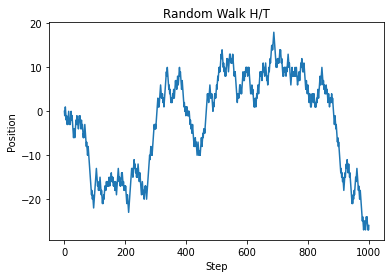

In [4]:
def basic_walk() -> list:
    """
    Generates simple random walk.
    :return positions:
    """
    positions = [0]
    for i in range(steps):
        rand = np.random.randint(0, 2)
        if rand:
            positions.append(positions[-1] + 1)
        if not rand:
            positions.append(positions[-1] - 1)
    return positions

positions = basic_walk()
plt.plot(positions)
plt.xlabel("Step")
plt.ylabel("Position")
plt.title("Random Walk H/T")
plt.show()

In [83]:
print(f"Starting position: 0")
print(f"Last Position (step {steps}): {positions[-1]}")
print(f"Square root of {steps} steps: {np.sqrt(steps)}")

Starting position: 0
Last Position (step 1000): -26
Square root of 1000 steps: 31.622776601683793


For this walk, we consider 3 static points representing the corners of a triangle, and a random starting point for the walk. Then we iterate the following procedure: We first roll a 3 sided dice to figure out which vertex the point walks towards, each step going halfway between its current position and the vertex's position.

In [115]:
def points_walk(iters) -> list:
    # Initializing the positions
    positions = np.zeros((iters, 2))
    positions[0, :] = np.random.uniform(-1,1, 2)

    # Arrange n static points evenly spaced around a unit circle
    statics = np.vstack((np.cos(np.linspace(0,2*np.pi, 4))[::-1], np.sin(np.linspace(0,2*np.pi,4))[::-1])).T
    for i in range(1, iters):
        vertex = np.random.randint(0,3)
        positions[i, :] = (positions[i-1]+statics[vertex])/2
    return positions.T

Text(0.5, 1.0, '3 points walk')

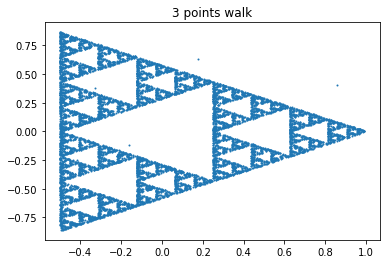

In [122]:
xvals, yvals = points_walk(iters=10000)
plt.scatter(xvals, yvals, s=1)
plt.title("3 points walk")